# Polynomial Regression: an Application of Linear Regression
Linear regression is a powerful tool that need not only apply to estimating best-fit hyperplanes. Here we explore another use for linear regression: polynomial fitting.

## 1. Linearity of Polynomials
A linear model is not always suitable for the data that is given. This may seem obvious at first, but let's explore that concept.
Let's take a look at the following data, which will be based off the non-linear $x^3$ curve.

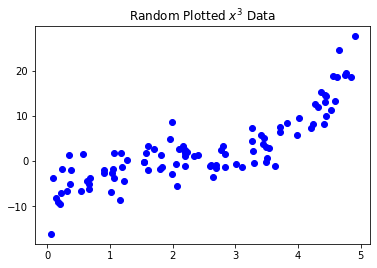

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Reproducability
np.random.seed(1000)

# Number of samples
m = 100

# Generates an (x-2)^3 with normal noise
x = np.random.uniform(0,5,m)
y = ((x - 2) ** 3) + (3 * np.random.normal(size=(m,)))

# Plots the dataset
plt.scatter(x, y, c='blue')
plt.title('Random Plotted $x^3$ Data')
plt.show()


We can attempt to use the standard linear regression model to capture this data...

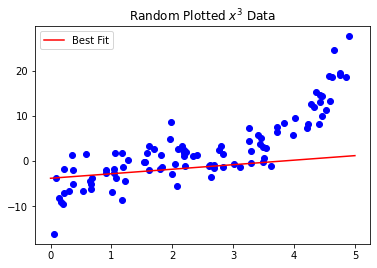

In [37]:
from linear_regression.linear_regression import LinearRegression

# Closed form fits the data
lr_model = LinearRegression()
lr_model.fit_closed(x,y)

# Plots the generated model with the original data
x_lin = np.linspace(0,5,200)
y_lin = lr_model.get_bias() + lr_model.get_weights()[0] + x_lin
plt.plot(x_lin, y_lin, c='red', label='Best Fit')
plt.scatter(x, y, c='blue')
plt.title('Random Plotted $x^3$ Data')
plt.legend()
plt.show()


It doesn't seem to fit... as one would expect. We can verify this through looking at the residuals and see the shape.

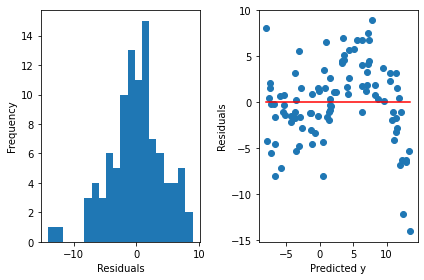

In [38]:
# Sets number of bins for histogram
n_bins = 20

# Gets predictions for training data and residuals
pred_y = lr_model.predict(x)
residuals = pred_y - y

# Creates plots for residual data
fig, axs = plt.subplots(1, 2, tight_layout=True)

axs[0].hist(residuals, bins=n_bins)
axs[0].set_xlabel('Residuals')
axs[0].set_ylabel('Frequency')

axs[1].scatter(pred_y, residuals)
zero_x = np.linspace(np.amin(pred_y),np.amax(pred_y),10)
zero_y = np.zeros((10,))
axs[1].plot(zero_x, zero_y, c= 'red')
axs[1].set_xlabel('Predicted y')
axs[1].set_ylabel('Residuals')

plt.show()

The residuals seem to be left skewed, as seen from the histogram. There is also existence of a clear pattern for the residuals in the second plot. These are indications that the linear model is insufficient for this task. Completely expected for an $x^3$ curve!

A non-trivial polynomial curve cannot be adequately modeled by an n-dimensional hyperplane (the output of a standard linear regression model). Yet, by the name of this notebook, it is implied that linear regression can be used to solve such an issue. How?

In my view, the confusion comes from not understanding the scope that linear functions have. From studying linear algebra, one knows that linear functions are _not_ just the set of hyperplanes. In fact, linear functions are _any_ function $L: \real ^n \to \real ^m$ that satisfies the below specifications:

* $L(x+y) = Lx + Ly$
* $L(\alpha x) = \alpha L(x)$

for all $x,y \in \real ^n$, $\alpha \in \real$.

The set of polynomial functions does follow this criteria (proving this is a relatively simple, standard exercise that I highly recommend doing). Even though in a polynomial

$$P_n(x) = \beta _0 + \beta _1 (x) + \beta _2 (x^2) + \dots + \beta _n (x^n)$$

the $x$ terms are raised to arbitrary powers, the $\beta _i$ terms themselves are linear. That is the key to the linearity of polynomials.



## 2. Applying Polynomial Fitting to Linear Regression
Now that we know the linear regression model should be able to handle polynomials, how do we apply them?

It's actually quite simple, instead of each $x_i$ term being independent, they instead are just increased powers of a single $x$ term. In practice, this just means concatenating  Below is a wrapper that will perform polynomial fitting using the linear regression module, and a 3rd degree polynomial fit of the data: 

In [39]:
from tools.helper_functions import coerce_1d_array

def polynomial_fit(X_train: np.ndarray, y_train: np.ndarray, degree: int) -> np.ndarray:
    """
    Applies nth degree polynomial fit using training data
    """
    x_t = coerce_1d_array(X_train, axis=0)
    x_new = x_t
    # Stacks x^i ... x^n terms onto training set
    for d in range(2,degree+1):
        x_new = np.column_stack((x_new, x_t ** d))
    # Performs linear regression using the new training data
    return LinearRegression().fit_closed(x_new,y_train)

# Fits 3rd degree polynomial to data
beta_3 = polynomial_fit(x,y,3)
print('Predicted coefficients:\n  {}'.format(beta_3))

Predicted coefficients:
  [-9.75189873 13.75544456 -6.42707519  1.01708133]


Taking the original function $(x-2)^3$, and expanding it, we the following:
$$x^3 - 6x^2 + 12x - 8$$
In other words, the true coefficients of the function are
$$[-8, 12, -6, 1]$$
That seems close to the $\beta$ that Linear Regression outputted! The best fit curve can now be visualized...

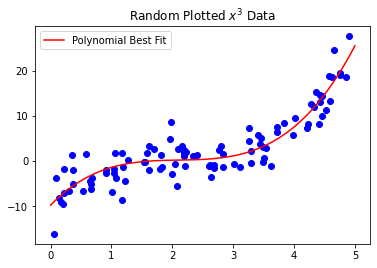

In [40]:
def polynomial_function(beta: np.ndarray, x: np.ndarray):
    """Gets the value of a polynomial with coefficients beta and x values"""
    x_t = coerce_1d_array(x, axis=0)
    # Column stacks bias terms (1s with xs)
    x_new = [np.ones((x.shape[0],1))] + [x_t]
    x_new = np.column_stack(x_new)
    # Column stacks x^i ... x^n
    for d in range(2,beta.shape[0]):
        x_new = np.column_stack((x_new, x_t ** d))
    return x_new @ beta

# Plots the generated model with the original data
x_lin = np.linspace(0,5,200)
y_lin = polynomial_function(beta_3, x_lin)
plt.plot(x_lin, y_lin, c='red', label='Polynomial Best Fit')
plt.scatter(x, y, c='blue')
plt.title('Random Plotted $x^3$ Data')
plt.legend()
plt.show()

That is a lot better than the simple linear regression!

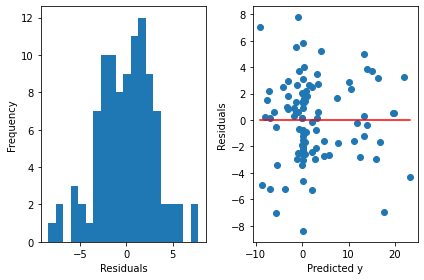

In [41]:
# Gets predictions for training data and residuals
pred_y_3 = polynomial_function(beta_3, x)
residuals_3 = pred_y_3 - y

# Creates plots for residual data
fig, axs = plt.subplots(1, 2, tight_layout=True)

axs[0].hist(residuals_3, bins=n_bins)
axs[0].set_xlabel('Residuals')
axs[0].set_ylabel('Frequency')

axs[1].scatter(pred_y_3, residuals_3)
zero_x = np.linspace(np.amin(pred_y_3),np.amax(pred_y_3),10)
zero_y = np.zeros((10,))
axs[1].plot(zero_x, zero_y, c= 'red')
axs[1].set_xlabel('Predicted y')
axs[1].set_ylabel('Residuals')

plt.show()

The residuals closely follow a normal curve, and the residuals seem to be unaffected by the predicted values. This model accurately reflects the data.

### 3. Choosing The Model
There is one aspect that was overlooked in the previous section. Since we already knew the data was made from cubic data, we knew to choose 3rd degree polynomial fitting. This is not the case in general. The data can be formed from higher order polynomials!

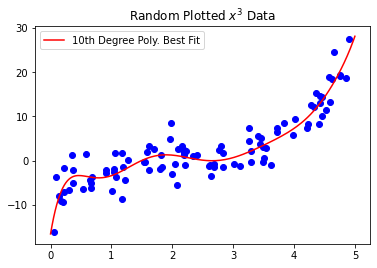

In [42]:
beta_10 = polynomial_fit(x,y,10)

# Plots the generated model with the original data
x_lin = np.linspace(0,5,200)
y_lin = polynomial_function(beta_10, x_lin)
plt.plot(x_lin, y_lin, c='red', label='10th Degree Poly. Best Fit')
plt.scatter(x, y, c='blue')
plt.title('Random Plotted $x^3$ Data')
plt.legend()
plt.show()

It may be hard to notice at first, but this 10th degree polynomial does fit the training data better than the 3rd degree one. Let's compare their residuals.

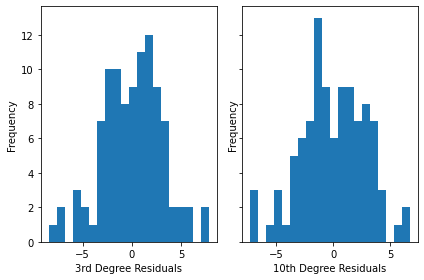

In [43]:
# Gets predictions for training data and residuals
pred_y_10 = polynomial_function(beta_10, x)
residuals_10 = pred_y_10 - y

# Creates plots for residual data
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

axs[0].hist(residuals_3, bins=n_bins)
axs[0].set_xlabel('3rd Degree Residuals')
axs[0].set_ylabel('Frequency')

axs[1].hist(residuals_10, bins=n_bins)
axs[1].set_xlabel('10th Degree Residuals')
axs[1].set_ylabel('Frequency')

plt.show()

The 10th degree polynomial seems to have desirable effects, though it is clear the effects are so minimal that it is overfitting. We want the balance of explainability (being able to properly reflect the data) and interpretability (not being too complicated). Luckily, for these polynomial models, there exists criterion that determine the best model.

The Bayesian Information Criterion (BIC) is one of these. The formula is as follows:
$$BIC = \ln (n) k - 2 \ln (\hat{L})$$

where
* $n$ - The number of samples used
* $k$ - The parameters used in the model
* $\hat{L}$ - Maximized value of the likelihood function of the model

The goal of a model is to have a low BIC. In other words, a model's goal is to minimize the BIC score in comparison to other model choices.
$\hat{L}$ is not the easiest value to get, but luckily there's a [simplification for when errors are guaussian](https://en.wikipedia.org/wiki/Bayesian_information_criterion#Gaussian_special_case):

$$BIC = \ln (n) k + n \ln (\hat \sigma)$$

where
* $\hat \sigma$ - The error variance of the model

$\hat \sigma$ is equivalent to the [residual sum of squares](https://en.wikipedia.org/wiki/Ordinary_least_squares#Estimation) over the number of samples. The residual is very easy to calculate, so this will be the version that will be implemented.

In [44]:
def determine_best_polynomial(x, y, highest_order: int):
    """
    Will determine the best polynomial model using BIC.

    :param x: X Training data
    :param y: y training data
    :param highest_order: The highest order polynomial that will be tested

    :returns: betas for the best polynomial, all bic scores
    """
    bic_scores = []
    betas = []
    for o in range(1,highest_order+1):
        # Gets best-fit polynomial of order o
        betas.append(polynomial_fit(x,y,o))
        # Gets residuals
        pred_y = polynomial_function(betas[o-1], x)
        residuals = pred_y - y
        # Calculates residual sum of squares
        rss = np.sum(residuals ** 2)
        # Calculates BIC (m=n, o=k)
        bic = m * np.log(rss / m) + o * np.log(m)
        bic_scores.append(bic)
    
    # Gets minimum bic score
    min_index = bic_scores.index(min(bic_scores))

    return betas[min_index], bic_scores


highest_polynomial = 12
beta, bic_scores = determine_best_polynomial(x,y,highest_polynomial)

print('Degree of best polynomial: {}'.format(beta.shape[0]-1))

Degree of best polynomial: 3


To show how the penalties affect higher ordered polynomials, here is the graph of BIC scores.

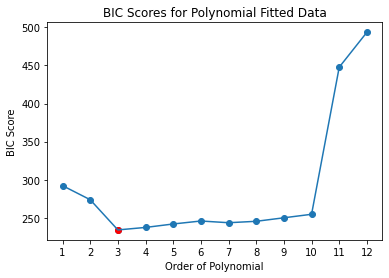

In [45]:
plt.plot([i for i in range(1,highest_polynomial+1)], bic_scores)
plt.scatter([i for i in range(1,highest_polynomial+1)], bic_scores)
plt.scatter([beta.shape[0]-1], bic_scores[beta.shape[0]-2], c= 'red')
plt.xticks([i for i in range(1,highest_polynomial+1)])
plt.xlabel('Order of Polynomial')
plt.ylabel('BIC Score')
plt.title('BIC Scores for Polynomial Fitted Data')
plt.show()